<a href="https://colab.research.google.com/github/rykah14/DrugReviewDataset/blob/main/aniruddhachoudhury_DrugReviewDataset_test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


In [3]:
!pip install transformers

     |████████████████████████████████| 1.5MB 8.5MB/s 
     |████████████████████████████████| 2.9MB 29.0MB/s 
     |████████████████████████████████| 890kB 51.5MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=e263c34dca603c117899775355928fe60da972570e4bd2478e1fe750311986bc
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [4]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=7479f8786490cc78f2f7b77520f590c902179eaf83e07bd13fa2dc2254c6ea77
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [5]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip

--2021-01-07 09:59:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/00462/drugsCom_raw.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 42989872 (41M) [application/x-httpd-php]
Saving to: ‘drugsCom_raw.zip’

drugsCom_raw.zip    100%[===================>]  41.00M  65.1MB/s    in 0.6s    

2021-01-07 09:59:30 (65.1 MB/s) - ‘drugsCom_raw.zip’ saved [42989872/42989872]



In [6]:
!unzip drugsCom_raw.zip

Archive:  drugsCom_raw.zip
  inflating: drugsComTest_raw.tsv    
  inflating: drugsComTrain_raw.tsv   


In [7]:
import pandas as pd

# Load the dataset into a pandas dataframe.
df = pd.read_table("drugsComTest_raw.tsv", delimiter='\t', header=None, names=['drugName','condition','review',	'rating'	,'date','usefulCount'])

# Report the number of sentences.
print('Number of training sentences: {:,}\n'.format(df.shape[0]))

# Display 10 random rows from the data.
df.sample(10)

Number of training sentences: 53,767



,drugName,condition,review,rating,date,usefulCount
155067.0,Metronidazole,Bacterial Infection,"""I had Mirena for 2 years and suffered from\r\...",8.0,"July 12, 2016",4
73010.0,Ethinyl estradiol / norethindrone,Birth Control,"""By far the best birth control pill I&#039;ve ...",10.0,"March 11, 2015",0
224665.0,Bupropion,Smoking Cessation,"""Okay, so I started taking this to assist me i...",9.0,"June 30, 2017",13
99949.0,Magnesium sulfate / potassium sulfate / sodium...,Bowel Preparation,"""It tastes SO BAD. I don&#039;t know how the g...",10.0,"December 29, 2015",4
115495.0,Propofol,Anesthesia,"""I went in today for an Upper GI endoscopy and...",9.0,"January 14, 2014",22
89050.0,Singulair,Allergic Rhinitis,"""I never had allergies until I was an adult. M...",7.0,"October 26, 2015",34
82542.0,Liraglutide,NaN,"""I&#039;ve been really pleased with the low bl...",8.0,"July 9, 2010",8
146791.0,Alprazolam,Anxiety,"""Helps wth anxiety but makes me very sleepy, r...",7.0,"May 10, 2017",18
219238.0,Ortho Cyclen,Birth Control,"""I have been on this pill for almost two years...",6.0,"October 17, 2013",4
7889.0,Xanax,Anxiety,"""Just great. I do not use the prescribed amoun...",10.0,"February 19, 2012",14


In [8]:
!sed -e 's/"/'\''/g' ./drugsComTest_raw.tsv > ./drugsComTest_raw_re.tsv

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split

# データの読込
df = pd.read_table('./drugsComTest_raw_re.tsv', header=None, sep='\t', names=['drugName','condition','review',	'rating'	,'date','usefulCount'])

# データの抽出
df = df.loc[df['condition'].isin(['Depression','Pain']), ['condition', 'review']]
#ADHDは削除して2値分類
df=df.replace('Depression', 0)
df=df.replace('Pain', 1)
#のちのことを考慮してint型の数値にreplace
#df=df.replace('ADHD', '2')
print(df)


        condition                                             review
163740          0  '''I&#039;ve tried a few antidepressants over ...
178004          1  '''Been on 30mg Cymbalta for 2 weeks. Started ...
141462          0  '''I am a 22 year old female college student. ...
201582          0  '''Zoloft did not help me at all.  I was on it...
131683          0  '''Sadly only lasted 5 days on Effexor XR. The...
...           ...                                                ...
164760          1  '''No side effects and back to work in a coupl...
27561           0  '''I have been taking maprotiline for over 35 ...
28754           0  '''I&#039;m a 19 year old girl and I&#039;ve b...
23352           1  '''Have been taking it for 6 years (120 millig...
47656           1  '''I was prescribed Nucynta for severe neck/sh...

[5195 rows x 2 columns]


In [10]:
df.loc[df.condition == 0].sample(5)[['condition','review']]

,condition,review
171591,0,'''I&#039;ve been taking Wellbutrin for two ye...
183091,0,'''I took this for depression and chronic back...
168981,0,'''I developed Serotonin Syndrome. Diarrhea (...
93179,0,"'''Started of the 5mg Brintellix, I usually h..."
92851,0,'''I am currently in rehab I was addicted to b...


In [11]:
# Get the lists of sentences and their labels.
conditions = df.condition.values
reviews = df.review.values

In [12]:
print(reviews[1:10])

["'''Been on 30mg Cymbalta for 2 weeks. Started getting relief by the 2nd day. Am 58 year old male with spinal stenosis, degenerative disc disease, and spondy. Plan was to go to 60mg but I am getting enough relief at 30mg. I believe I will try to stay on that dose to minimize side effects. Some constipation, difficult reaching orgasm, some night sweats and minor headaches. Oh, insomnia if I took it at night.  I had samples of this medicine for 6 months but delayed starting it because of horror stories on the internet. Pain was ruining my life so this medicine seems to be the best option.'''"
 "'''I am a 22 year old female college student. I wanted to write this because when I was at my lowest of low when I felt absolutely hopeless... these positive reviews are what got me through the day. I experienced a lot of change.  I was also in a relationship that made me unhappy. I stopped doing the things I liked to do such as run, party, work, hang out with friends etc. In result, I never had 

In [13]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [14]:
tokenizer

PreTrainedTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_len=512, is_fast=False, padding_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'})

In [15]:
# Print the original sentence.
print(' Original: ', reviews[10])

# Print the sentence split into tokens.
print('Tokenized: ', tokenizer.tokenize(reviews[10]))

# Print the sentence mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(reviews[10])))

 Original:  '''Started taking it and I slept well at night and awoke early around 5 to start my day happily. But come 8 am and I am drowsy and needed to take already two hrs nap. Awake and resume
Tokenized:  ["'", "'", "'", 'started', 'taking', 'it', 'and', 'i', 'slept', 'well', 'at', 'night', 'and', 'awoke', 'early', 'around', '5', 'to', 'start', 'my', 'day', 'happily', '.', 'but', 'come', '8', 'am', 'and', 'i', 'am', 'dr', '##ows', '##y', 'and', 'needed', 'to', 'take', 'already', 'two', 'hr', '##s', 'nap', '.', 'awake', 'and', 'resume']
Token IDs:  [1005, 1005, 1005, 2318, 2635, 2009, 1998, 1045, 7771, 2092, 2012, 2305, 1998, 19179, 2220, 2105, 1019, 2000, 2707, 2026, 2154, 11361, 1012, 2021, 2272, 1022, 2572, 1998, 1045, 2572, 2852, 15568, 2100, 1998, 2734, 2000, 2202, 2525, 2048, 17850, 2015, 18996, 1012, 8300, 1998, 13746]


In [16]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []

# For every sentence...
for sent in reviews:
    # `encode` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    encoded_sent = tokenizer.encode(
                        sent,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'

                        # This function also supports truncation and conversion
                        # to pytorch tensors, but we need to do padding, so we
                        # can't use these features :( .
                        #max_length = 128,          # Truncate all sentences.
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.
    input_ids.append(encoded_sent)

# Print sentence 0, now as a list of IDs.
print('Original: ', reviews[10])
print('Token IDs:', input_ids[10])

Token indices sequence length is longer than the specified maximum sequence length for this model (609 > 512). Running this sequence through the model will result in indexing errors


Original:  '''Started taking it and I slept well at night and awoke early around 5 to start my day happily. But come 8 am and I am drowsy and needed to take already two hrs nap. Awake and resume
Token IDs: [101, 1005, 1005, 1005, 2318, 2635, 2009, 1998, 1045, 7771, 2092, 2012, 2305, 1998, 19179, 2220, 2105, 1019, 2000, 2707, 2026, 2154, 11361, 1012, 2021, 2272, 1022, 2572, 1998, 1045, 2572, 2852, 15568, 2100, 1998, 2734, 2000, 2202, 2525, 2048, 17850, 2015, 18996, 1012, 8300, 1998, 13746, 102]


In [17]:
print('Max sentence length: ', max([len(sen) for sen in input_ids]))

Max sentence length:  609


In [18]:
# We'll borrow the `pad_sequences` utility function to do this.
from keras.preprocessing.sequence import pad_sequences

# Set the maximum sequence length.
# I've chosen 64 somewhat arbitrarily. It's slightly larger than the
# maximum training sentence length of 47...
MAX_LEN = 64

print('\nPadding/truncating all sentences to %d values...' % MAX_LEN)

print('\nPadding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))

# Pad our input tokens with value 0.
# "post" indicates that we want to pad and truncate at the end of the sequence,
# as opposed to the beginning.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")

print('\nDone.')


Padding/truncating all sentences to 64 values...

Padding token: "[PAD]", ID: 0

Done.


In [19]:
# Create attention masks
attention_masks = []

# For each sentence...
for sent in input_ids:
    
    # Create the attention mask.
    #   - If a token ID is 0, then it's padding, set the mask to 0.
    #   - If a token ID is > 0, then it's a real token, set the mask to 1.
    att_mask = [int(token_id > 0) for token_id in sent]
    
    # Store the attention mask for this sentence.
    attention_masks.append(att_mask)

In [20]:
# Use train_test_split to split our data into train and validation sets for
# training
from sklearn.model_selection import train_test_split

# Use 90% for training and 10% for validation.
train_inputs, validation_inputs, train_conditions, validation_conditions = train_test_split(input_ids, conditions, 
                                                            random_state=2018, test_size=0.1)
# Do the same for the masks.
train_masks, validation_masks, _, _ = train_test_split(attention_masks, conditions,
                                             random_state=2018, test_size=0.1)

In [21]:
# Convert all inputs and labels into torch tensors, the required datatype 
# for our model.
train_inputs = torch.tensor(train_inputs)
validation_inputs = torch.tensor(validation_inputs)

train_conditions = torch.tensor(train_conditions)
validation_conditions = torch.tensor(validation_conditions)

train_masks = torch.tensor(train_masks)
validation_masks = torch.tensor(validation_masks)

In [22]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here.
# For fine-tuning BERT on a specific task, the authors recommend a batch size of
# 16 or 32.

batch_size = 32

# Create the DataLoader for our training set.
train_data = TensorDataset(train_inputs, train_masks, train_conditions)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# Create the DataLoader for our validation set.
validation_data = TensorDataset(validation_inputs, validation_masks, validation_conditions)
validation_sampler = SequentialSampler(validation_data)
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [23]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
model.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [24]:
# Get all of the model's parameters as a list of tuples.
params = list(model.named_parameters())

print('The BERT model has {:} different named parameters.\n'.format(len(params)))

print('==== Embedding Layer ====\n')

for p in params[0:5]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== First Transformer ====\n')

for p in params[5:21]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

print('\n==== Output Layer ====\n')

for p in params[-4:]:
    print("{:<55} {:>12}".format(p[0], str(tuple(p[1].size()))))

The BERT model has 201 different named parameters.

==== Embedding Layer ====

bert.embeddings.word_embeddings.weight                  (30522, 768)
bert.embeddings.position_embeddings.weight                (512, 768)
bert.embeddings.token_type_embeddings.weight                (2, 768)
bert.embeddings.LayerNorm.weight                              (768,)
bert.embeddings.LayerNorm.bias                                (768,)

==== First Transformer ====

bert.encoder.layer.0.attention.self.query.weight          (768, 768)
bert.encoder.layer.0.attention.self.query.bias                (768,)
bert.encoder.layer.0.attention.self.key.weight            (768, 768)
bert.encoder.layer.0.attention.self.key.bias                  (768,)
bert.encoder.layer.0.attention.self.value.weight          (768, 768)
bert.encoder.layer.0.attention.self.value.bias                (768,)
bert.encoder.layer.0.attention.output.dense.weight        (768, 768)
bert.encoder.layer.0.attention.output.dense.bias              (

In [26]:
# Note: AdamW is a class from the huggingface library (as opposed to pytorch) 
# I believe the 'W' stands for 'Weight Decay fix"
optimizer = AdamW(model.parameters(),
                  lr = 5e-5, # args.learning_rate - default is 5e-5, our notebook had 2e-5
                  #5e-5でやる
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8.
                )

In [27]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs (authors recommend between 2 and 4)
epochs = 4

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)
scheduler

In [28]:
import numpy as np

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [29]:
import time
import datetime

def format_time(elapsed):
    '''
    Takes a time in seconds and returns a string hh:mm:ss
    '''
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))

In [30]:
import random

# This training code is based on the `run_glue.py` script here:
# https://github.com/huggingface/transformers/blob/5bfcd0485ece086ebcbed2d008813037968a9e58/examples/run_glue.py#L128


# Set the seed value all over the place to make this reproducible.
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store the average loss after each epoch so we can plot them.
loss_values = []

# For each epoch...
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================
    
    # Perform one full pass over the training set.

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch_i + 1, epochs))
    print('Training...')

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(train_dataloader), elapsed))

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        # (source: https://stackoverflow.com/questions/48001598/why-do-we-need-to-call-zero-grad-in-pytorch)
        model.zero_grad()        

        # Perform a forward pass (evaluate the model on this training batch).
        # This will return the loss (rather than the model output) because we
        # have provided the `labels`.
        # The documentation for this `model` function is here: 
        # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
        outputs = model(b_input_ids, 
                    token_type_ids=None, 
                    attention_mask=b_input_mask, 
                    labels=b_labels)
        
        # The call to `model` always returns a tuple, so we need to pull the 
        # loss value out of the tuple.
        loss = outputs[0]

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end. `loss` is a Tensor containing a
        # single value; the `.item()` function just returns the Python value 
        # from the tensor.
        total_loss += loss.item()

        # Perform a backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters and take a step using the computed gradient.
        # The optimizer dictates the "update rule"--how the parameters are
        # modified based on their gradients, the learning rate, etc.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)            
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss))
    print("  Training epcoh took: {:}".format(format_time(time.time() - t0)))
        
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.

    print("")
    print("Running Validation...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model.eval()

    # Tracking variables 
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0

    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Add batch to GPU
        batch = tuple(t.to(device) for t in batch)
        
        # Unpack the inputs from our dataloader
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients, saving memory and
        # speeding up validation
        with torch.no_grad():        

            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have
            # not provided labels.
            # token_type_ids is the same as the "segment ids", which 
            # differentiates sentence 1 and 2 in 2-sentence tasks.
            # The documentation for this `model` function is here: 
            # https://huggingface.co/transformers/v2.2.0/model_doc/bert.html#transformers.BertForSequenceClassification
            outputs = model(b_input_ids, 
                            token_type_ids=None, 
                            attention_mask=b_input_mask)
        
        # Get the "logits" output by the model. The "logits" are the output
        # values prior to applying an activation function like the softmax.
        logits = outputs[0]

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        tmp_eval_accuracy = flat_accuracy(logits, label_ids)
        
        # Accumulate the total accuracy.
        eval_accuracy += tmp_eval_accuracy

        # Track the number of batches
        nb_eval_steps += 1

    # Report the final accuracy for this validation run.
    print("  Accuracy: {0:.2f}".format(eval_accuracy/nb_eval_steps))
    print("  Validation took: {:}".format(format_time(time.time() - t0)))

print("")
print("Training complete!")


======== Epoch 1 / 4 ========
Training...
  Batch    40  of    147.    Elapsed: 0:00:15.
  Batch    80  of    147.    Elapsed: 0:00:30.
  Batch   120  of    147.    Elapsed: 0:00:46.

  Average training loss: 0.24
  Training epcoh took: 0:00:56

Running Validation...
  Accuracy: 0.96
  Validation took: 0:00:02

======== Epoch 2 / 4 ========
Training...
  Batch    40  of    147.    Elapsed: 0:00:17.
  Batch    80  of    147.    Elapsed: 0:00:33.
  Batch   120  of    147.    Elapsed: 0:00:49.

  Average training loss: 0.09
  Training epcoh took: 0:00:59

Running Validation...
  Accuracy: 0.94
  Validation took: 0:00:02

======== Epoch 3 / 4 ========
Training...
  Batch    40  of    147.    Elapsed: 0:00:16.
  Batch    80  of    147.    Elapsed: 0:00:32.
  Batch   120  of    147.    Elapsed: 0:00:48.

  Average training loss: 0.04
  Training epcoh took: 0:00:59

Running Validation...
  Accuracy: 0.95
  Validation took: 0:00:02

======== Epoch 4 / 4 ========
Training...
  Batch    40  of 

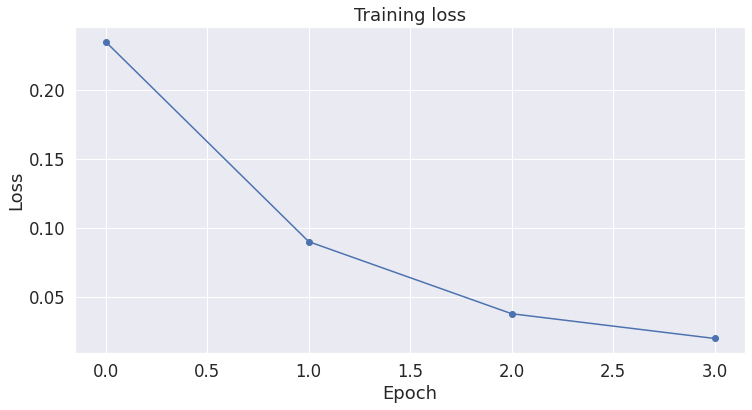

In [31]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o')

# Label the plot.
plt.title("Training loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()